In [ ]:
import urllib.request
import numpy as np
from PIL import Image
import tensorflow.compat.v1 as tf

# Load the label file from the GitHub repo and strip off carriage return
url = 'https://raw.githubusercontent.com/taiwotman/Smart-Traffic/master/predictor/retrained_labels.txt'
label_lines = [line.decode('utf-8').rstrip() for line in urllib.request.urlopen(url)]

# Get the tensorflow model from the GitHub repo
graph = tf.Graph()
url = 'https://github.com/taiwotman/Smart-Traffic/blob/master/predictor/retrained_graph.pb?raw=true'
with graph.as_default():
  with urllib.request.urlopen(url) as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

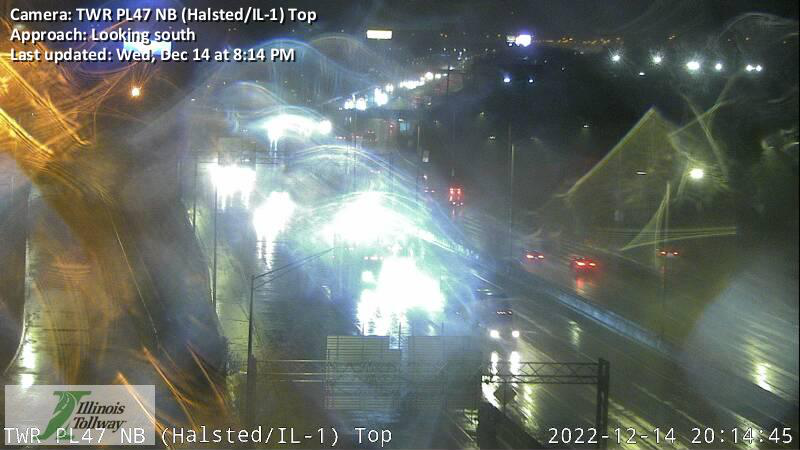

In [ ]:
# Get image from one of the traffic cameras freely available (without an API key!) at
# https://gis-idot.opendata.arcgis.com/datasets/IDOT::illinois-gateway-traffic-cameras/explore?location=40.504125%2C-89.189251%2C7.58
# Copy & paste the "SnapShot" URL for the camera.
url = 'https://www.travelmidwest.com/lmiga/snapshot?id=IL-ISTHA-2911&direction=S'
filename, _ = urllib.request.urlretrieve(url)
img = Image.open(filename)
img

In [ ]:
with tf.Session(graph=graph) as sess:
  # Feed the image_data as input to the graph and get first prediction
  softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
  predictions = sess.run(softmax_tensor, {'DecodeJpeg:0': img})
  # Print the score for each label
  print(f"{'Label':20} {'Score':7}")
  print("----------------------------")
  for i in range(4):
    print(f"{label_lines[i]:20} {predictions[0][i]:.5f}")
  # Sort to show labels of first prediction in order of confidence
  top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
  # Print the prediction(s) -- Is this correct?
  for node_id in top_k:
      congestion_type = label_lines[node_id]
      score = predictions[0][node_id]
      if (score >= 0.5):
        print('\nPrediction: %s (score = %.5f)' % (congestion_type, score))

Label                Score  
----------------------------
None                 0.00235
Low congestion       0.23503
High congestion      0.71591
Medium congestion    0.04672

Prediction: High congestion (score = 0.71591)
